<a href="https://colab.research.google.com/github/Jihanablh/Bootcamp_Intelligo_ID/blob/main/ML_Pipelines_Chatbot_and_CNN_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Upload dan Pembacaan Dataset**

Pada tahap ini, file dataset diunggah dan dibaca menggunakan pandas. Langkah ini penting untuk memulai proses analisis dengan memastikan data sudah tersedia dan dapat diakses dalam format yang sesuai untuk diproses lebih lanjut.

In [1]:
from google.colab import files

uploaded = files.upload()

Saving dataset.csv to dataset.csv


In [2]:
uploaded

{'dataset.csv': b'Question,Answer\r\nApa saja kelompok etnis utama di Indonesia?,"Kelompok etnis utama di Indonesia meliputi Jawa, Sunda, Batak, Minangkabau, Bugis, dan Bali."\r\nApa saja agama-agama besar yang dianut di Indonesia?,"Islam, Kristen, Hindu, Budha, Konghucu, dan kepercayaan tradisional."\r\nSebutkan tiga tarian tradisional Indonesia.,"Tari Saman, Tari Kecak, dan Tari Pendet."\r\nApa saja makanan tradisional yang populer di Indonesia?,"Rendang, nasi goreng, sate, gado-gado, dan soto."\r\nBahasa apa yang digunakan di Indonesia?,"Bahasa Indonesia adalah bahasa resmi, dengan ratusan bahasa daerah seperti Jawa, Sunda, Bali, dan Madura."\r\nApakah ibu kota negara Indonesia?,Jakarta.\r\nApa moto nasional Indonesia?,Bhinneka Tunggal Ika (Kesatuan dalam Keragaman).\r\nSebutkan beberapa pulau terkenal di Indonesia.,"Jawa, Sumatra, Borneo (Kalimantan), Sulawesi, dan Papua."\r\nApa alat musik tradisional Indonesia?,Gamelan dan Angklung.\r\nApa pakaian nasional Indonesia?,Kebaya untuk

In [4]:
import io
import pandas as pd

df = pd.read_csv(io.StringIO(uploaded['dataset.csv'].decode('utf-8')))
print(df)

                                             Question  \
0         Apa saja kelompok etnis utama di Indonesia?   
1   Apa saja agama-agama besar yang dianut di Indo...   
2         Sebutkan tiga tarian tradisional Indonesia.   
3   Apa saja makanan tradisional yang populer di I...   
4             Bahasa apa yang digunakan di Indonesia?   
5                   Apakah ibu kota negara Indonesia?   
6                        Apa moto nasional Indonesia?   
7      Sebutkan beberapa pulau terkenal di Indonesia.   
8               Apa alat musik tradisional Indonesia?   
9                     Apa pakaian nasional Indonesia?   
10  Apa sebutan untuk rumah tradisional masyarakat...   
11  Pulau mana di Indonesia yang terkenal dengan k...   
12         Apa nama teater wayang kulit di Indonesia?   
13    Apa nama kota batik yang terkenal di Indonesia?   
14                 Apa nama bunga nasional Indonesia?   
15     Sebutkan sebuah upacara tradisional dari Bali.   
16  Apa nama maskapai penerbang

# **Pemrosesan dan Pembuatan Model Chatbot Berbasis Teks**

Pipeline ini menangani transformasi teks menggunakan TF-IDF dan membangun fungsi untuk menjawab pertanyaan berdasarkan kemiripan teks (cosine similarity). Dengan pendekatan ini, chatbot dapat memberikan respons yang relevan terhadap input pengguna berdasarkan data yang tersedia.

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

df = pd.read_csv("dataset.csv")

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df["Question"])

def get_response(user_input):
    user_vec = vectorizer.transform([user_input])
    similarity = cosine_similarity(user_vec, tfidf_matrix)
    max_sim = similarity.max()

    if max_sim < 0.3:
        return "Maaf, saya belum mengerti pertanyaan itu."

    best_idx = similarity.argmax()
    return df.iloc[best_idx]["Answer"]

while True:
    user_input = input("Kamu: ")
    if user_input.lower() == "exit":
        print("Chatbot: Sampai jumpa!")
        break
    print("Chatbot:", get_response(user_input))

Kamu: apa pakaian nasional indonesia
Chatbot: Kebaya untuk wanita dan batik atau beskap untuk pria.
Kamu: apa makanan nasional yang populer
Chatbot: Rendang, nasi goreng, sate, gado-gado, dan soto.
Kamu: apa nama pelabuhan terbesar di indonesia
Chatbot: Pelabuhan Tanjung Priok.
Kamu: apa moto nasional indonesia
Chatbot: Bhinneka Tunggal Ika (Kesatuan dalam Keragaman).
Kamu: nama maskapai penerbangan nasional di indonesia
Chatbot: Garuda Indonesia.
Kamu: auieuoeoske
Chatbot: Maaf, saya belum mengerti pertanyaan itu.
Kamu: exit
Chatbot: Sampai jumpa!


# *Pengelolaan dan Penyusunan Dataset Gambar*

Di bagian ini, file gambar yang diunggah disusun ke dalam folder sesuai kategori (misal: mawar dan anggrek). Pengorganisasian dataset yang rapi sangat penting agar proses pelatihan model dapat berjalan dengan baik dan data mudah diakses oleh algoritma.

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving mawar.jpg to mawar.jpg
Saving anggrek.jpg to anggrek.jpg


In [ ]:
import os
import shutil

# Buat struktur folder dataset/mawar dan dataset/anggrek
os.makedirs("dataset/mawar", exist_ok=True)
os.makedirs("dataset/anggrek", exist_ok=True)

# Pindahkan gambar ke folder sesuai nama file
for filename in os.listdir():
    if filename.startswith("mawar") and filename.endswith(".jpg"):
        shutil.move(filename, f"dataset/mawar/{filename}")
    elif filename.startswith("anggrek") and filename.endswith(".jpg"):
        shutil.move(filename, f"dataset/anggrek/{filename}")

print("Selesai menyusun dataset!")

Selesai menyusun dataset!


In [ ]:
import os

for root, dirs, files in os.walk("dataset"):
    print(root)
    for file in files:
        print("   ", file)

dataset
dataset/anggrek
    anggrek.jpg
dataset/mawar
    mawar.jpg


# **Pembuatan, Pelatihan, dan Evaluasi Model CNN untuk Klasifikasi Gambar**

Pada tahap ini, data gambar yang telah dipersiapkan melalui proses preprocessing menggunakan ImageDataGenerator diolah lebih lanjut dengan membangun model Convolutional Neural Network (CNN). Model CNN terdiri dari beberapa lapisan konvolusi dan pooling yang berfungsi mengekstrak fitur penting dari gambar untuk klasifikasi. Setelah model selesai dibangun, dilakukan pelatihan menggunakan data yang sudah disiapkan, kemudian performa model dievaluasi dengan mengukur akurasi selama proses pelatihan. Hasil evaluasi ini divisualisasikan dalam bentuk grafik yang memperlihatkan perkembangan akurasi dari epoch ke epoch, sehingga memudahkan pemahaman tentang kemampuan model dalam belajar dan memberikan gambaran kualitas model secara keseluruhan.


Found 2 images belonging to 2 classes.
Epoch 1/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 225ms/step - accuracy: 0.0000e+00 - loss: 1.8218
Epoch 2/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 220ms/step - accuracy: 0.6667 - loss: 0.3915
Epoch 3/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 158ms/step - accuracy: 1.0000 - loss: 0.1083
Epoch 4/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 1.0000 - loss: 0.1633
Epoch 5/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 1.0000 - loss: 0.0351


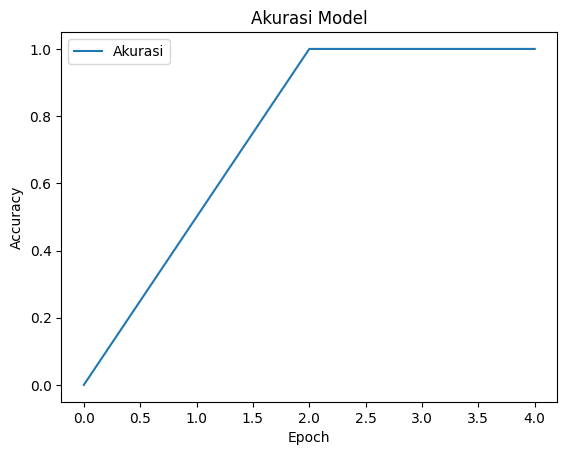

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Parameter
img_size = (150, 150)
batch_size = 1
epochs = 5

# Load gambar (tanpa validasi karena dataset sangat kecil)
datagen = ImageDataGenerator(rescale=1./255)

train_gen = datagen.flow_from_directory(
    'dataset',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# CNN Model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(train_gen.num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training
history = model.fit(
    train_gen,
    epochs=epochs
)

# Plot hasil
plt.plot(history.history['accuracy'], label='Akurasi')
plt.title("Akurasi Model")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Simpan model
model.save("image_classifier_model.h5")